# Melanoma Cancer Detection

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

Installing libraries

In [1]:
import pathlib
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Rescaling, Conv2D, Activation, BatchNormalization, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [12]:
!wget -O CNN_assignment.zip --no-check-certificate "https://drive.google.com/uc?export=download&id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs&confirm=t"


--2023-03-15 14:12:31--  https://drive.google.com/uc?export=download&id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs&confirm=t
Resolving drive.google.com (drive.google.com)... 172.253.119.100, 172.253.119.102, 172.253.119.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.119.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l4pf8082bvukcjp23bugpkd4743gs8lq/1678889550000/10915318309229425367/*/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs?e=download&uuid=7bb680ed-1728-4533-8e75-523020663b7e [following]
--2023-03-15 14:12:31--  https://doc-04-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l4pf8082bvukcjp23bugpkd4743gs8lq/1678889550000/10915318309229425367/*/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs?e=download&uuid=7bb680ed-1728-4533-8e75-523020663b7e
Resolving doc-04-2k-docs.googleusercontent.com (doc-04-2k-docs.googleusercontent.com)... 142.250

In [13]:
!unzip /content/CNN_assignment.zip -d /content/data/

Archive:  /content/CNN_assignment.zip
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: /content/data/Skin cancer ISIC T

In [15]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [16]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [14]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation

In [17]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writing the dataset

train_ds = keras.utils.image_dataset_from_directory(directory=data_dir_train, 
                                                    labels = "inferred",
                                                    label_mode = "categorical",
                                                    batch_size = batch_size,
                                                    image_size = (img_height, img_width),
                                                    seed = 123,
                                                    subset = "training",
                                                    validation_split = 0.2
                                                    )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [18]:
## Write your validation dataset here

val_ds = keras.utils.image_dataset_from_directory(directory=data_dir_train, 
                                                    labels = "inferred",
                                                    label_mode = "categorical",
                                                    batch_size = batch_size,
                                                    image_size = (img_height, img_width),
                                                    seed = 123,
                                                    subset = "validation",
                                                    validation_split = 0.2
                                                    )
     

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [19]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [20]:
# Method to visualize dataset

def visualize_one_class_instance(tf_data):
  
  figure = plt.figure(figsize =(10,5))

  for images, labels in tf_data:
    for i in range(len(class_names)):
      for label in labels:
        if label[i] == 1:
          ax = figure.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_names[i])
          plt.axis("off")
          break

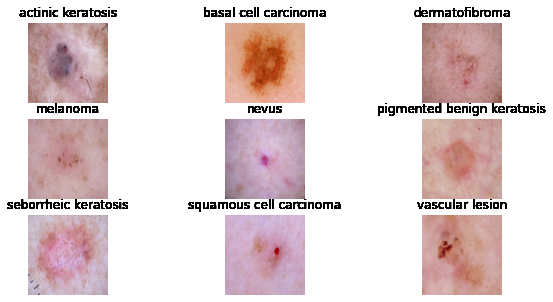

In [21]:
#Visualizing on the training data
visualize_one_class_instance(train_ds)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [22]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [23]:
### Your code goes here

#Helper to create the Model
def make_model(input_shape, num_classes):
  
  #Define the model
  model = Sequential()

  #Add the input and rescaling layers
  model.add(Input(input_shape))
  model.add(Rescaling(1./ 255))

  #Add 1st convolution layer
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  #Batch normalization to improve efficiency
  model.add(BatchNormalization())

  #2nd Convolution layer
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  #Batch normalization to improve efficiency
  model.add(BatchNormalization())
  #Max Pooling to reduce dimensions
  model.add(MaxPooling2D(pool_size=(2, 2)))


  #2nd Convolution layer
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  #Flattening layer followed by fully connected output layer with softmax activation function for classification
  model.add(Flatten())
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  return model
  
model= make_model(input_shape = (img_width, img_height, 3), num_classes=len(class_names))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [24]:
### Todo, choose an appropriate optimiser and loss function

model.compile(optimizer="SGD",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [25]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 activation (Activation)     (None, 178, 178, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 178, 178, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 176, 176, 32)      0         
                                                        

### Train the model

In [26]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 30s 133ms/step - loss: 28.2999 - accuracy: 0.2812 - val_loss: 14.3873 - val_accuracy: 0.0671
Epoch 2/20
56/56 [==============================] - 4s 64ms/step - loss: 9.6689 - accuracy: 0.4492 - val_loss: 13.5059 - val_accuracy: 0.1700
Epoch 3/20
56/56 [==============================] - 4s 64ms/step - loss: 5.6237 - accuracy: 0.5290 - val_loss: 7.0165 - val_accuracy: 0.2237
Epoch 4/20
56/56 [==============================] - 4s 73ms/step - loss: 3.4250 - accuracy: 0.5926 - val_loss: 4.2161 - val_accuracy: 0.3557
Epoch 5/20
56/56 [==============================] - 4s 67ms/step - loss: 2.0365 - accuracy: 0.6747 - val_loss: 3.4320 - val_accuracy: 0.4407
Epoch 6/20
56/56 [==============================] - 4s 69ms/step - loss: 1.3537 - accuracy: 0.7561 - val_loss: 3.3923 - val_accuracy: 0.3960
Epoch 7/20
56/56 [==============================] - 4s 75ms/step - loss: 0.9938 - accuracy: 0.7779 - val_loss: 3.2358 - val_accuracy: 0.4541
Epoch 8/

### Visualizing training results

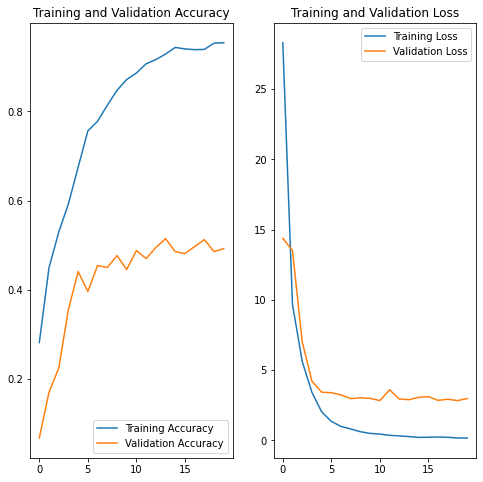

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

________________________________________________________________________

The final training accuracy for four convolution layers without Dropout/augmentation is 95.26%, and the final validation accuracy for the model is 49.89%. 

As can be observed from the graph above as well, the model is severely overfitting.

**Proposed Solution**

There can be multiple root causes for overfitting, but the most glaring one here is the absence of a sufficiently large dataset. Since our dataset is primarily composed of images, we can overcome this limitation by adding **augmented** images in the dataset.

According to [this](https://ieeexplore.ieee.org/document/9257859) paper, the two low-cost, yet effective methods of augmentation that work the best are - geometrical transformations and noise addition.

Therefore, I'll be adding flipped images first to see the performance impact.

The second treatment to cure overfitting is to add dropout layers after each convolution to **unlearn** some of the data patterns.

In [28]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

#Creating data augmentation layer for preprocessing the dataset

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)


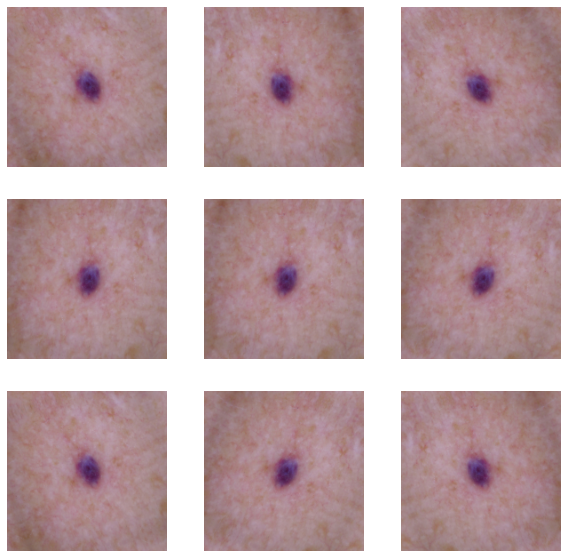

In [29]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model

In [30]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

def make_model_improved(input_shape, num_classes):

  #Define the model
  model = Sequential()

  #Add the input and rescaling layers
  model.add(Input(input_shape))
  model.add(data_augmentation)
  model.add(Rescaling(1./ 255))

  #Add 1st convolution layer
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  #Batch normalization to improve efficiency
  model.add(BatchNormalization())
  

  #2nd Convolution layer
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  #Batch normalization to improve efficiency
  model.add(BatchNormalization())
  #Max Pooling to reduce dimensions
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #Add dropout to cure overfitting
  model.add(Dropout(0.25))


  #2nd Convolution layer
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  #Flattening layer followed by fully connected output layer with softmax activation function for classification
  model.add(Flatten())
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  return model
  
model= make_model(input_shape = (img_width, img_height, 3), num_classes=len(class_names))



In [31]:
# summary of the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 activation_4 (Activation)   (None, 178, 178, 32)      0         
                                                                 
 batch_normalization_3 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 activation_5 (Activation)   (None, 176, 176, 32)      0         
                                                      

### Compiling the model

In [32]:
## Your code goes here

model.compile(
    optimizer="SGD",
    loss="categorical_crossentropy",
    metrics = ["accuracy"]
)

### Training the model

In [33]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 72ms/step - loss: 26.6675 - accuracy: 0.2701 - val_loss: 29.3811 - val_accuracy: 0.0380
Epoch 2/20
56/56 [==============================] - 4s 65ms/step - loss: 11.4944 - accuracy: 0.3996 - val_loss: 28.1956 - val_accuracy: 0.0492
Epoch 3/20
56/56 [==============================] - 4s 65ms/step - loss: 6.7055 - accuracy: 0.4743 - val_loss: 8.9833 - val_accuracy: 0.1633
Epoch 4/20
56/56 [==============================] - 4s 66ms/step - loss: 3.2718 - accuracy: 0.5921 - val_loss: 4.7087 - val_accuracy: 0.2864
Epoch 5/20
56/56 [==============================] - 4s 65ms/step - loss: 2.0586 - accuracy: 0.6429 - val_loss: 3.9618 - val_accuracy: 0.3490
Epoch 6/20
56/56 [==============================] - 4s 69ms/step - loss: 1.4701 - accuracy: 0.7087 - val_loss: 3.3056 - val_accuracy: 0.4139
Epoch 7/20
56/56 [==============================] - 4s 69ms/step - loss: 1.1495 - accuracy: 0.7472 - val_loss: 2.9142 - val_accuracy: 0.4340
Epoch 8/2

### Visualizing the results

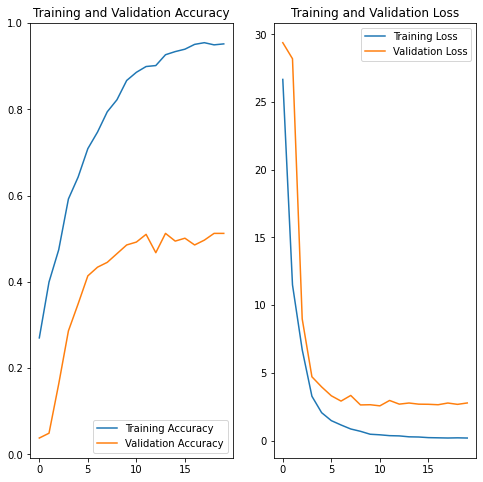

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.
_______________________________________________________________________

The model is still largely overfitting, as the best fit accuracy for the model is 95.09% for trianing and 53.24% for validation. This is a slight improvement from the earlier model, due to the augmentation and dropout layer additions.

In [35]:
## Your code goes here.

#Get all the labels from the train dataset
train_y = np.concatenate([y for x, y in train_ds], axis=0)

class_counts = {}

for label in train_y:
  for i in range(0, 9):
    if label[i] == 1:
      if class_names[i] in class_counts.keys():
        class_counts[class_names[i]] += 1
      else:
        class_counts.update({class_names[i]:1})

print(dict(sorted(class_counts.items(), key=lambda item: item[1])))

{'seborrheic keratosis': 58, 'dermatofibroma': 77, 'actinic keratosis': 92, 'vascular lesion': 115, 'squamous cell carcinoma': 142, 'nevus': 277, 'basal cell carcinoma': 309, 'melanoma': 352, 'pigmented benign keratosis': 370}


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

Class "seborrheic keratosis" has the least number of samples - 58

#### - Which classes dominate the data in terms proportionate number of samples?

Classes "melanoma" and "pigmented benign keratosis" dominate the data with 352 and 370 samples respectively, with "nevus" and "basal cell carcinoma" following closely behind


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [36]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [37]:
path_to_training_dataset=str(data_dir_train) + "/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCE7679E520>: 100%|██████████| 500/500 [00:18<00:00, 27.23 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCE929650A0>: 100%|██████████| 500/500 [00:18<00:00, 26.92 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCE7682BD60>: 100%|██████████| 500/500 [00:18<00:00, 27.25 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCE767522E0>: 100%|██████████| 500/500 [01:24<00:00,  5.89 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FCE92AAF070>: 100%|██████████| 500/500 [01:31<00:00,  5.47 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCE76732B20>: 100%|██████████| 500/500 [00:19<00:00, 25.03 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCE768603A0>: 100%|██████████| 500/500 [00:50<00:00,  9.87 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCE92B459A0>: 100%|██████████| 500/500 [00:17<00:00, 27.92 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCE928A46D0>: 100%|██████████| 500/500 [00:19<00:00, 26.24 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [38]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [49]:
#Create the original training dataset

path_list = [x for x in glob(os.path.join(str(data_dir_train), '*', '*.jpg'))]
path_list
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(str(data_dir_train), '*', '*.jpg'))]
lesion_list

#Create dictionary
dataframe_dict = dict(zip(path_list, lesion_list))
#Create dataframe
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [42]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0028224.jpg_2e4a189e-6f81-4bb6-a788-d93807a1f91b.jpg',
 '/content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0032356.jpg_f2be006a-227d-4f47-a7bc-f37c16914ec1.jpg',
 '/content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030794.jpg_e90b9615-6c39-432d-9291-63d717b9bdf1.jpg',
 '/content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026522.jpg_f1447a31-93be-47fd-8dbb-1fa526ddff98.jpg',
 '/content/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030549.jpg_8e5

In [43]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [45]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [50]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [51]:
new_df['Label'].value_counts()

Train                         2239
squamous cell carcinoma        500
melanoma                       500
actinic keratosis              500
dermatofibroma                 500
seborrheic keratosis           500
vascular lesion                500
nevus                          500
pigmented benign keratosis     500
basal cell carcinoma           500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [46]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [52]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [53]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [59]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [60]:
#Helper to create the Model
def make_model(input_shape, num_classes):
  
  #Define the model
  model = Sequential()

  #Add the input and rescaling layers
  model.add(Input(input_shape))
  model.add(Rescaling(1./ 255))

  #Add 1st convolution layer
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  #Batch normalization to improve efficiency
  model.add(BatchNormalization())

  #2nd Convolution layer
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  #Batch normalization to improve efficiency
  model.add(BatchNormalization())
  #Max Pooling to reduce dimensions
  model.add(MaxPooling2D(pool_size=(2, 2)))


  #2nd Convolution layer
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  #Flattening layer followed by fully connected output layer with softmax activation function for classification
  model.add(Flatten())
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  return model
  
model= make_model(input_shape = (img_width, img_height, 3), num_classes=len(class_names))



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [63]:
## your code goes here

model.compile(
    optimizer="SGD",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

#### **Todo:**  Train your model

In [64]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 35s 96ms/step - loss: 14.7193 - accuracy: 0.3696 - val_loss: 7.5778 - val_accuracy: 0.1819
Epoch 2/50
169/169 [==============================] - 12s 69ms/step - loss: 2.4530 - accuracy: 0.6118 - val_loss: 2.8447 - val_accuracy: 0.4232
Epoch 3/50
169/169 [==============================] - 12s 69ms/step - loss: 1.0163 - accuracy: 0.7385 - val_loss: 1.5932 - val_accuracy: 0.6132
Epoch 4/50
169/169 [==============================] - 12s 69ms/step - loss: 0.6451 - accuracy: 0.8025 - val_loss: 1.0696 - val_accuracy: 0.7068
Epoch 5/50
169/169 [==============================] - 12s 68ms/step - loss: 0.4894 - accuracy: 0.8459 - val_loss: 1.0710 - val_accuracy: 0.7097
Epoch 6/50
169/169 [==============================] - 12s 69ms/step - loss: 0.4169 - accuracy: 0.8696 - val_loss: 0.8206 - val_accuracy: 0.7713
Epoch 7/50
169/169 [==============================] - 12s 69ms/step - loss: 0.3474 - accuracy: 0.8934 - val_loss: 0.8175 - val_accuracy

#### **Todo:**  Visualize the model results

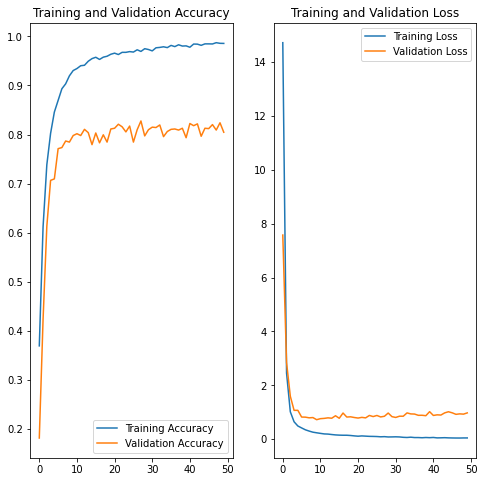

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

As seen in the above results, the best fit validation accuracy is around 82% and training accuracy is 97%. Thus the problem of overfitting is essentially resolved. 

Thus, in conclusion, class rebalnce has removed the unwanted learning patterns and helped reduce the overfitting problem significantly.